Starting analysis using folder paths from test.json...
Processing 1840 folders from test.json...

Total records collected: 7367
Number of folders processed: 1713
Total domains analyzed: 7367
Unique domains found: 1439

Top 20 Domains:


,domain,count,percentage
0,www.theguardian.com,2095,28.44
1,www.usatoday.com,403,5.47
2,www.cnn.com,205,2.78
3,www.latimes.com,140,1.90
4,www.bbc.com,134,1.82
5,www.independent.co.uk,126,1.71
6,en.wikipedia.org,113,1.53
7,www.nbcnews.com,102,1.38
8,www.yumpu.com,99,1.34
9,www.npr.org,65,0.88



Top Level Domains (TLDs):


,tld,count,percentage
0,com,5917,80.32
1,org,703,9.54
2,uk,274,3.72
3,edu,140,1.90
4,gov,57,0.77
5,au,48,0.65
6,net,29,0.39
7,mil,27,0.37
8,ie,22,0.30
9,ca,17,0.23



Source Types:


,source_type,count,percentage
0,images_with_captions,7367,100.0



Top Domains by Source Type:


source_type,images_with_captions
domain,
www.theguardian.com,2095
www.usatoday.com,403
www.cnn.com,205
www.latimes.com,140
www.bbc.com,134
www.independent.co.uk,126
en.wikipedia.org,113
www.nbcnews.com,102
www.yumpu.com,99


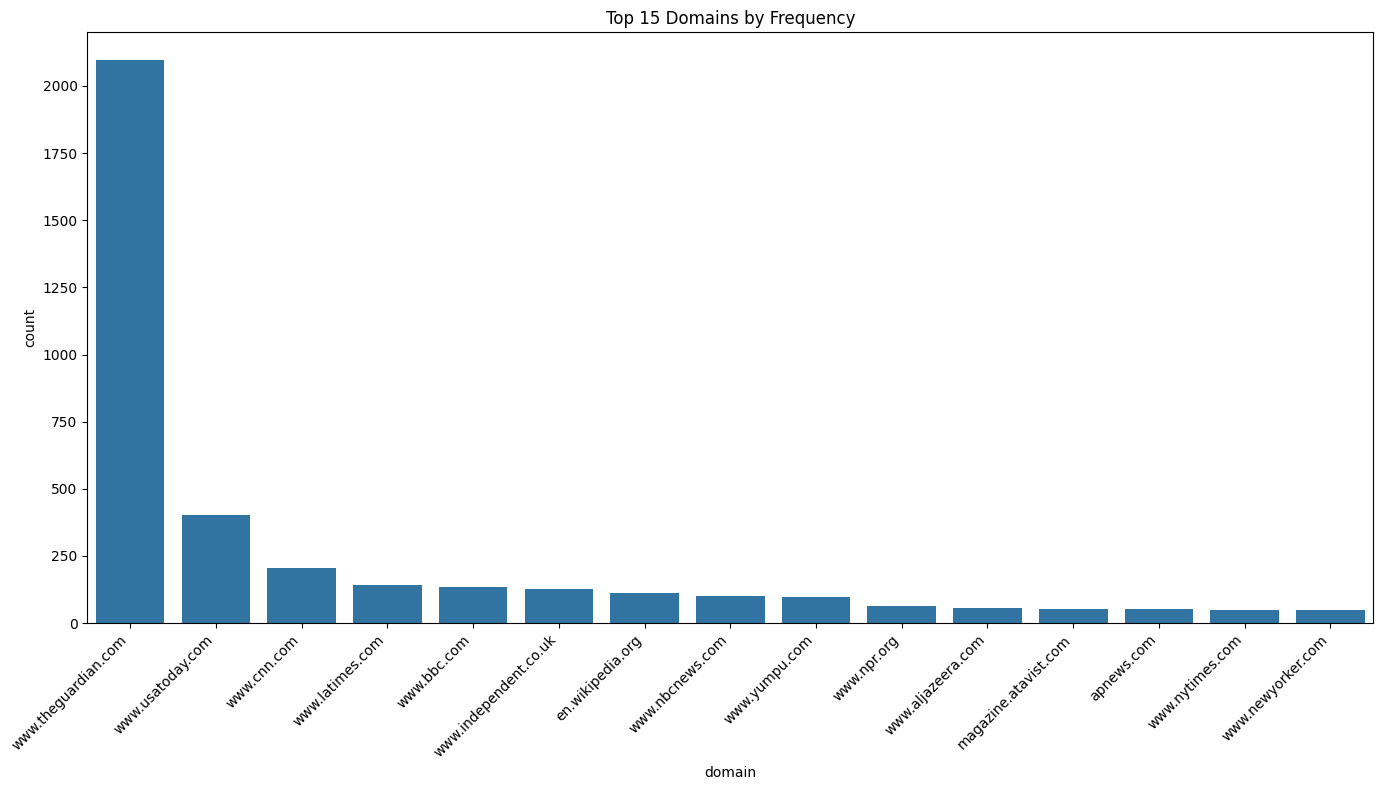

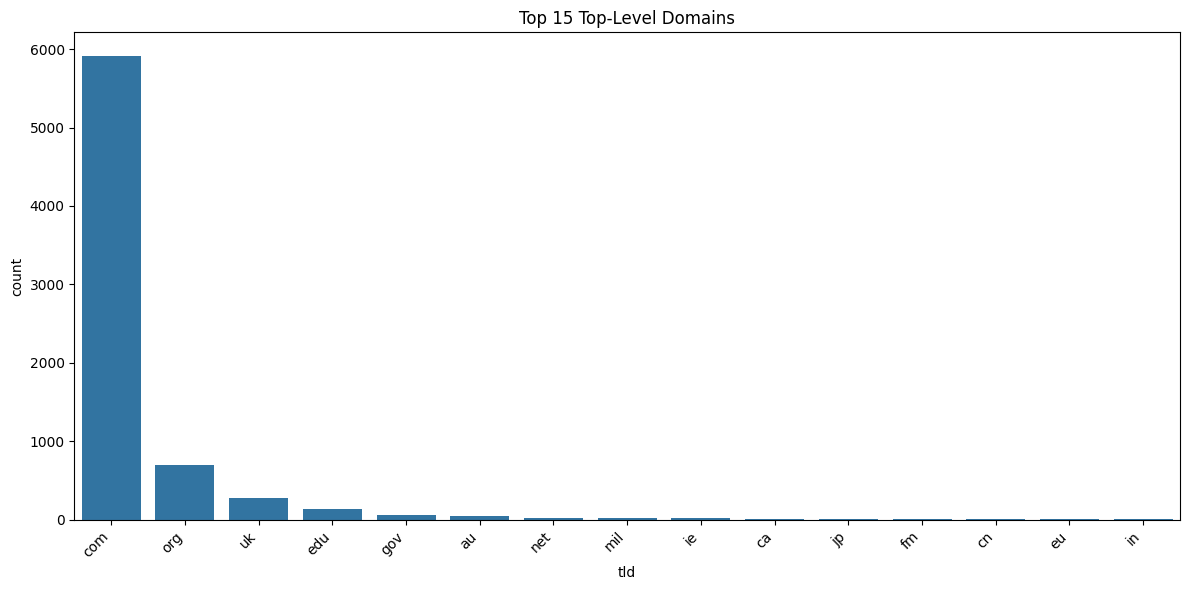

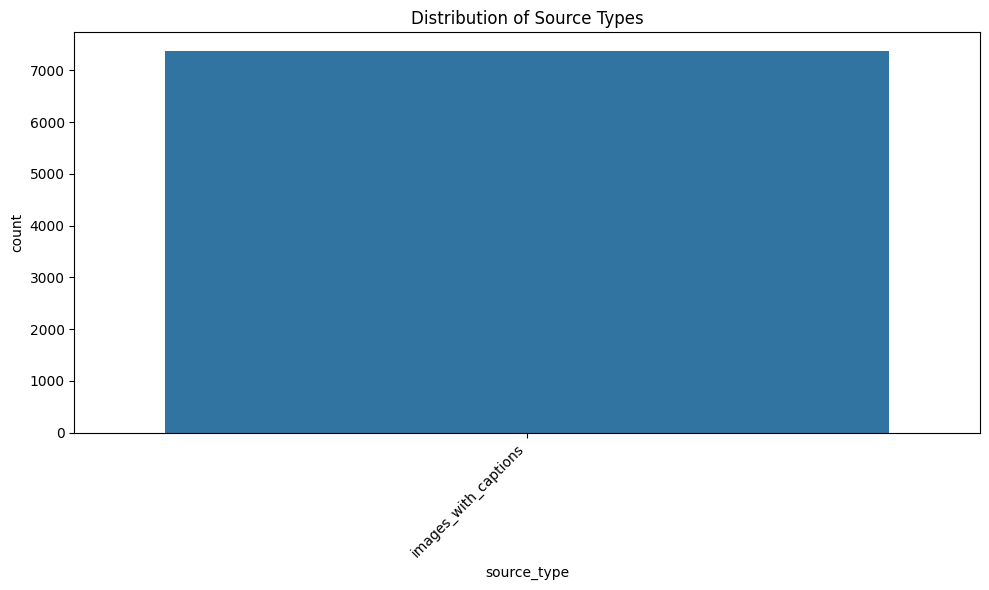


Total page links analyzed: 7367

Top Domains from Page Links:


,netloc,count,percentage
0,www.theguardian.com,2095,28.44
1,www.usatoday.com,403,5.47
2,www.cnn.com,205,2.78
3,www.latimes.com,140,1.90
4,www.bbc.com,134,1.82
5,www.independent.co.uk,126,1.71
6,en.wikipedia.org,113,1.53
7,www.nbcnews.com,102,1.38
8,www.yumpu.com,99,1.34
9,www.npr.org,65,0.88


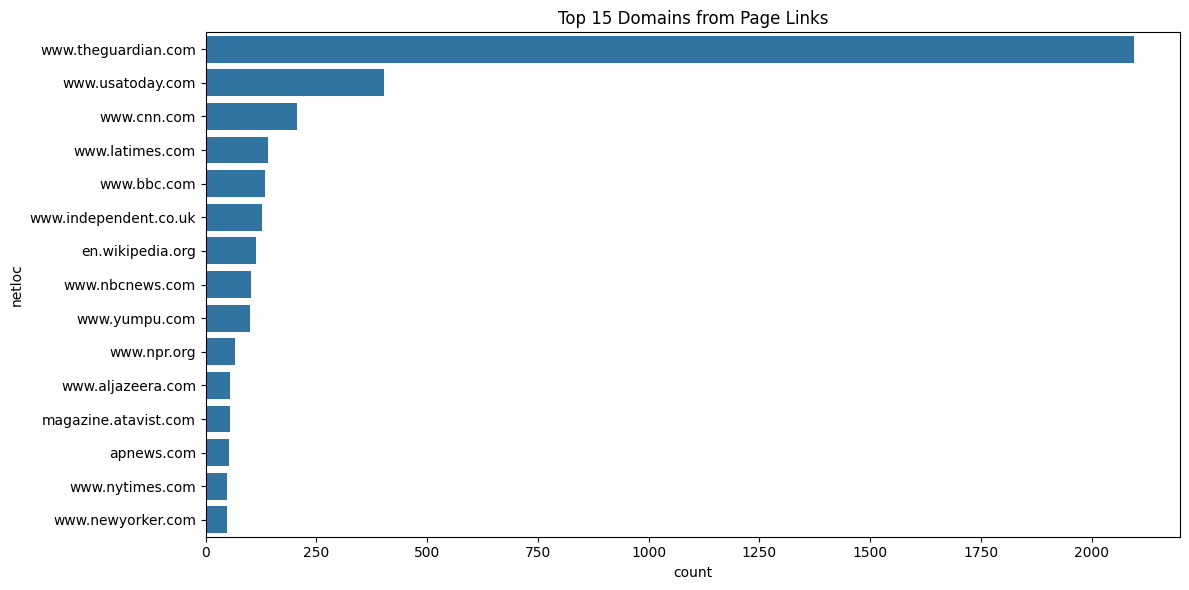

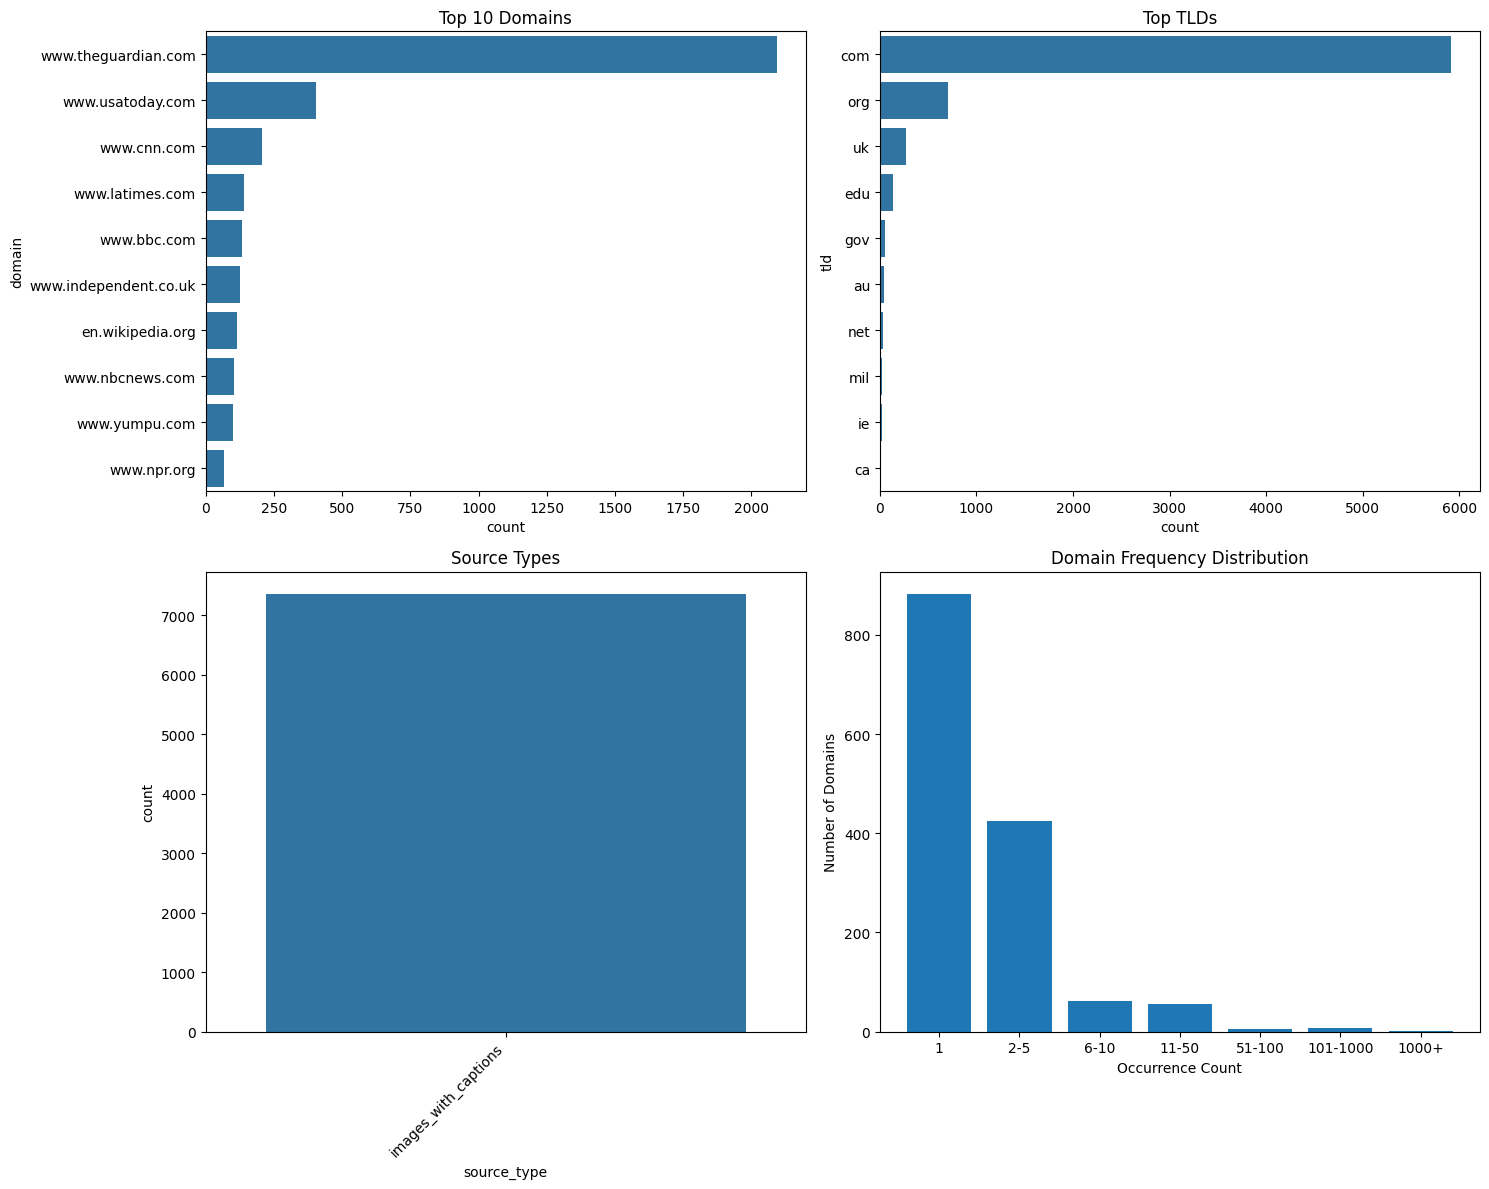

PermissionError: [Errno 13] Permission denied: 'domain_source_cross.csv'

In [4]:
# Domain Analysis Using Folder Paths from test.json
import os
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.parse import urlparse
from tqdm.notebook import tqdm  # Progress bar for notebooks
import re
from IPython.display import display, HTML

# Function to load the test.json file
def load_test_json(file_path="queries_dataset/merged_balanced/direct_search/test/test.json"):
    """
    Load the test.json file that contains folder paths.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return json.load(file)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return {}

# Function to load JSON data from a file
def load_json_file(file_path):
    """
    Load JSON data from a file. Returns None if file cannot be read.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return json.load(file)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Function to extract domains from a single data object
def extract_domains_from_data(data):
    """
    Extract domains from a data object that follows the structure in your example.
    """
    domains = []
    source_types = []
    page_links = []
    
    # Handle the specific JSON structure from your example
    categories = [
        'images_with_captions',
        # 'images_with_no_captions', 
        # 'images_with_caption_matched_tags'
    ]
    
    for category in categories:
        if category in data:
            for item in data[category]:
                if 'domain' in item:
                    domains.append(item['domain'])
                    source_types.append(category)
                if 'page_link' in item:
                    page_links.append(item['page_link'])
    
    return domains, source_types, page_links

# Function to process all folders from test.json
def process_folders_from_test_json():
    """
    Process folders listed in test.json and collect domain information.
    """
    # Load the test.json file
    test_data = load_test_json()
    
    if not test_data:
        print("Failed to load test.json or file is empty.")
        return pd.DataFrame(), pd.DataFrame()
    
    all_domains = []
    all_source_types = []
    all_page_links = []
    folder_ids = []
    
    print(f"Processing {len(test_data)} folders from test.json...")
    
    # Process each folder
    for folder_id, folder_info in test_data.items():
        # Get the folder path from test.json
        folder_path = folder_info.get('folder_path')
        if not folder_path:
            print(f"No folder path found for ID {folder_id}")
            continue
        
        # Look for direct_annotation.json in the folder
        direct_anno_path = os.path.join(folder_path, "direct_annotation.json")
        if os.path.exists(direct_anno_path):
            data = load_json_file(direct_anno_path)
            
            if data:
                domains, source_types, page_links = extract_domains_from_data(data)
                
                all_domains.extend(domains)
                all_source_types.extend(source_types)
                all_page_links.extend(page_links)
                folder_ids.extend([folder_id] * len(domains))
        else:
            print(f"No direct_annotation.json found in {folder_path}")
    
    # Create a DataFrame for analysis
    df = pd.DataFrame({
        'folder_id': folder_ids,
        'domain': all_domains,
        'source_type': all_source_types
    })
    
    # Add page links as a separate DataFrame
    links_df = pd.DataFrame({
        'page_link': all_page_links
    })
    
    return df, links_df

# Function to analyze domains
def analyze_domains(domain_df):
    """
    Analyze domain distribution and create visualizations.
    """
    if domain_df.empty:
        print("No domain data to analyze.")
        return {}
    
    # Overall statistics
    total_domains = len(domain_df)
    unique_domains = domain_df['domain'].nunique()
    print(f"Total domains analyzed: {total_domains}")
    print(f"Unique domains found: {unique_domains}")
    
    # Domain counts
    domain_counts = Counter(domain_df['domain'])
    domain_count_df = pd.DataFrame({
        'domain': list(domain_counts.keys()),
        'count': list(domain_counts.values())
    })
    domain_count_df['percentage'] = (domain_count_df['count'] / total_domains * 100).round(2)
    domain_count_df = domain_count_df.sort_values('count', ascending=False).reset_index(drop=True)
    
    # Display top domains
    top_n = min(20, len(domain_count_df))
    print(f"\nTop {top_n} Domains:")
    display(domain_count_df.head(top_n))
    
    # Calculate TLDs
    domain_df['tld'] = domain_df['domain'].apply(lambda x: x.split('.')[-1])
    tld_counts = Counter(domain_df['tld'])
    tld_df = pd.DataFrame({
        'tld': list(tld_counts.keys()),
        'count': list(tld_counts.values())
    })
    tld_df['percentage'] = (tld_df['count'] / total_domains * 100).round(2)
    tld_df = tld_df.sort_values('count', ascending=False).reset_index(drop=True)
    
    print("\nTop Level Domains (TLDs):")
    display(tld_df)
    
    # Source type analysis
    source_type_counts = Counter(domain_df['source_type'])
    source_df = pd.DataFrame({
        'source_type': list(source_type_counts.keys()),
        'count': list(source_type_counts.values())
    })
    source_df['percentage'] = (source_df['count'] / total_domains * 100).round(2)
    source_df = source_df.sort_values('count', ascending=False).reset_index(drop=True)
    
    print("\nSource Types:")
    display(source_df)
    
    # Cross-tabulation of domains by source type
    domain_source_cross = pd.crosstab(domain_df['domain'], domain_df['source_type'])
    
    # Get top 10 domains by total count for cross-tabulation
    top_domains = domain_count_df['domain'].head(10).tolist()
    top_domain_source_cross = domain_source_cross.loc[top_domains] if set(top_domains).issubset(set(domain_source_cross.index)) else domain_source_cross.head(10)
    
    print("\nTop Domains by Source Type:")
    display(top_domain_source_cross)
    
    # Plot domain distribution (top 15 domains)
    plt.figure(figsize=(14, 8))
    top_domains = domain_count_df.head(15)
    sns.barplot(x='domain', y='count', data=top_domains)
    plt.title('Top 15 Domains by Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Plot TLD distribution (top 15)
    plt.figure(figsize=(12, 6))
    top_tlds = tld_df.head(15)
    sns.barplot(x='tld', y='count', data=top_tlds)
    plt.title('Top 15 Top-Level Domains')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Plot source type distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x='source_type', y='count', data=source_df)
    plt.title('Distribution of Source Types')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Return the analysis DataFrames
    return {
        'domain_counts': domain_count_df,
        'tld_counts': tld_df,
        'source_counts': source_df,
        'domain_source_cross': domain_source_cross
    }

# Function to analyze page links
def analyze_page_links(links_df):
    """
    Analyze page links to extract URL patterns and insights.
    """
    if links_df.empty:
        print("No page links found for analysis.")
        return None
    
    total_links = len(links_df)
    print(f"\nTotal page links analyzed: {total_links}")
    
    # Parse URLs to extract components
    parsed_urls = [urlparse(url) for url in links_df['page_link']]
    
    # Extract netloc (domain)
    netlocs = [url.netloc for url in parsed_urls]
    netloc_counts = Counter(netlocs)
    netloc_df = pd.DataFrame({
        'netloc': list(netloc_counts.keys()),
        'count': list(netloc_counts.values())
    })
    netloc_df['percentage'] = (netloc_df['count'] / total_links * 100).round(2)
    netloc_df = netloc_df.sort_values('count', ascending=False).reset_index(drop=True)
    
    print("\nTop Domains from Page Links:")
    display(netloc_df.head(15))
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='netloc', data=netloc_df.head(15))
    plt.title('Top 15 Domains from Page Links')
    plt.tight_layout()
    plt.show()
    
    return {'netloc_counts': netloc_df}

# Create dashboard function
def create_dashboard(results):
    """
    Create a comprehensive dashboard with key insights.
    """
    if 'domain_analysis' not in results or not results['domain_analysis']:
        print("No data available for dashboard creation.")
        return
    
    domain_analysis = results['domain_analysis']
    
    plt.figure(figsize=(15, 12))
    
    # Domain distribution subplot (top 10)
    plt.subplot(2, 2, 1)
    top10_domains = domain_analysis['domain_counts'].head(10)
    sns.barplot(x='count', y='domain', data=top10_domains)
    plt.title('Top 10 Domains')
    
    # TLD distribution subplot
    plt.subplot(2, 2, 2)
    sns.barplot(x='count', y='tld', data=domain_analysis['tld_counts'].head(10))
    plt.title('Top TLDs')
    
    # Source type distribution subplot
    plt.subplot(2, 2, 3)
    sns.barplot(x='source_type', y='count', data=domain_analysis['source_counts'])
    plt.title('Source Types')
    plt.xticks(rotation=45, ha='right')
    
    # Domain frequency distribution
    plt.subplot(2, 2, 4)
    domain_analysis['domain_counts']['frequency_bucket'] = pd.cut(
        domain_analysis['domain_counts']['count'], 
        bins=[0, 1, 5, 10, 50, 100, 1000, float('inf')],
        labels=['1', '2-5', '6-10', '11-50', '51-100', '101-1000', '1000+']
    )
    freq_counts = domain_analysis['domain_counts']['frequency_bucket'].value_counts().sort_index()
    plt.bar(freq_counts.index, freq_counts.values)
    plt.title('Domain Frequency Distribution')
    plt.xlabel('Occurrence Count')
    plt.ylabel('Number of Domains')
    
    plt.tight_layout()
    plt.show()

# Main function to run the analysis
def main():
    """
    Main function to run the domain analysis using folder paths from test.json.
    """
    print("Starting analysis using folder paths from test.json...")
    
    # Process folders from test.json
    domain_df, links_df = process_folders_from_test_json()
    
    if domain_df.empty:
        print("No domain data was collected. Check if test.json exists and has valid folder paths.")
        return {}
    
    # Print basic stats
    print(f"\nTotal records collected: {len(domain_df)}")
    print(f"Number of folders processed: {domain_df['folder_id'].nunique()}")
    
    # Analyze domains
    domain_analysis = analyze_domains(domain_df)
    
    # Analyze page links
    link_analysis = analyze_page_links(links_df)
    
    # Prepare results
    results = {
        'domain_df': domain_df,
        'links_df': links_df,
        'domain_analysis': domain_analysis,
        'link_analysis': link_analysis
    }
    
    # Create dashboard
    create_dashboard(results)
    
    print("\nAnalysis complete! Results are available in the returned variable and have been saved to CSV files.")
    
    return results

# Execute the analysis
if __name__ == "__main__":
    results = main()